# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the confidence interval -- the range of the number of votes which encapsulates 95% of the data (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy 
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import statsmodels.stats.api as sms
from pylab import *
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,2793.851077,105341.500709,-44415.807259,-49859.545652,328367.085875,242510.874946,47436.181512,75761.922925,148853.385142,220465.210458,...,138454.070217,122488.069943,162247.982356,-273907.868554,-138410.570396,27638.756441,-33120.047151,-40989.824866,94532.974507,6128.841097
1993,-44406.485331,180815.466879,-108866.427539,-114625.083717,196807.232582,47161.295355,136522.083654,58826.904901,23329.019613,-96417.638483,...,-37809.868064,93228.910228,108183.379950,146728.060346,-10083.899508,-31300.144215,95017.857057,164071.514663,14409.944591,33298.608969
1994,134288.798913,169097.538334,337957.368420,-76005.273164,90130.207911,8453.626320,-24562.317561,195665.400438,-53475.640770,44708.230667,...,145216.405451,67773.006363,95711.194465,174500.629277,-27821.888075,-57881.583140,26321.525617,-21424.067186,60164.652898,-74750.286614
1995,-44485.202120,-156.410517,-13425.878636,53540.999558,130408.559874,20445.656224,60336.077232,60688.099156,-12748.496722,57150.175074,...,-636.804950,49707.896672,52687.564135,13529.920850,67016.324752,41664.942829,119870.946944,56946.289297,67927.466106,32839.707999


<IPython.core.display.Javascript object>


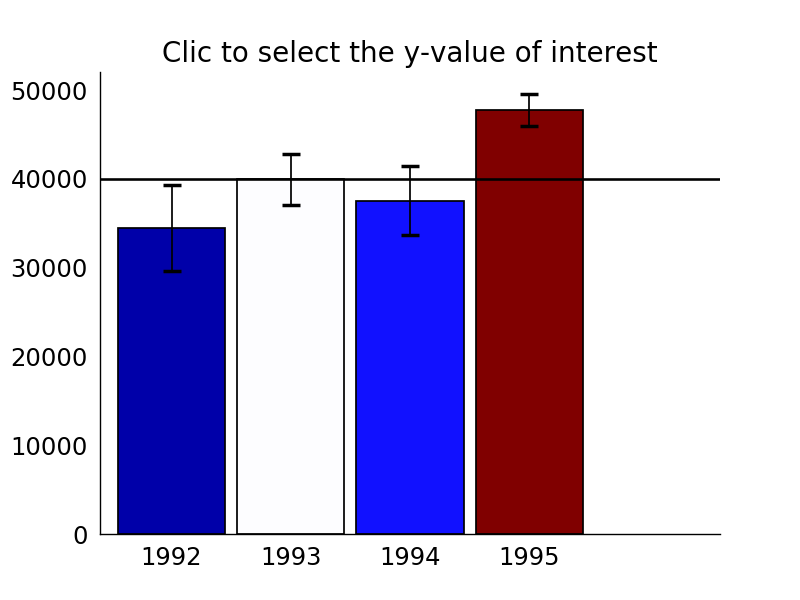

7

In [2]:
#Plot bar indicating the distribution of years??
import matplotlib.animation as animation
import scipy.stats as stats
import math 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

#this function calulates the probability density given an input value
#based on the new std obtained with the confidence interval (as seen in video,
# the value changes only in that distribution) so we can use the colormaps
def find_prob_color(value, diffR, mean_df):
    c1 = stats.norm(mean_df[0],diffR[0]).cdf(value)
    c2 = stats.norm(mean_df[1],diffR[1]).cdf(value)
    c3 = stats.norm(mean_df[2],diffR[2]).cdf(value)
    c4 = stats.norm(mean_df[3],diffR[3]).cdf(value)
    return(c1,c2,c3,c4)

#to interact with the graph
def onclick(event):
    plt.cla()    
    plt.gca().set_title('Y-axis value : {}'.format(float(int(event.ydata*100))/100), fontsize =16)
    plotting(event.ydata,diffR, mean_df,df)

#I am plotting my graph as a deinition so i can use it everytime that i clic in the yaxis
def plotting(inputdata, diffR, mean_df, df):
    my_cmap = plt.cm.get_cmap('seismic')
    value = inputdata
    c1, c2, c3, c4 = find_prob_color(value, diffR, mean_df.values)
    colors =[my_cmap(1-c1), my_cmap(1-c2), my_cmap(1-c3), my_cmap(1-c4)]
    ax = plt.bar(df.index,mean_df,width = 0.9, linewidth = 1, edgecolor = 'k',yerr=diffR,
                  color = colors,
                  error_kw=dict(ecolor='k', lw=1, capsize=5, capthick=2))

    plt.xlim(1991.4, 1996.6)
    plt.xticks(df.index, [str(year) for year in range(1992, 1996)], fontsize= 14)
    plt.yticks(fontsize=14)
    plt.plot([1990, 2000], [value, value], c='k')
    
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

#we compute the confidence intervals
mean_df = df.mean(axis=1)
std_df = df.std(axis=1)
R = stats.norm.interval(0.95,loc=mean_df,scale=std_df/math.sqrt(len(df.columns)))
diffR = 0.5*(R[1]-R[0])

#then we plot the bars
plt.figure() 
plotting(40000,diffR, mean_df,df)
plt.title('Clic to select the y-value of interest', fontsize = 16)

plt.gcf().canvas.mpl_connect('button_press_event', onclick)


<IPython.core.display.Javascript object>


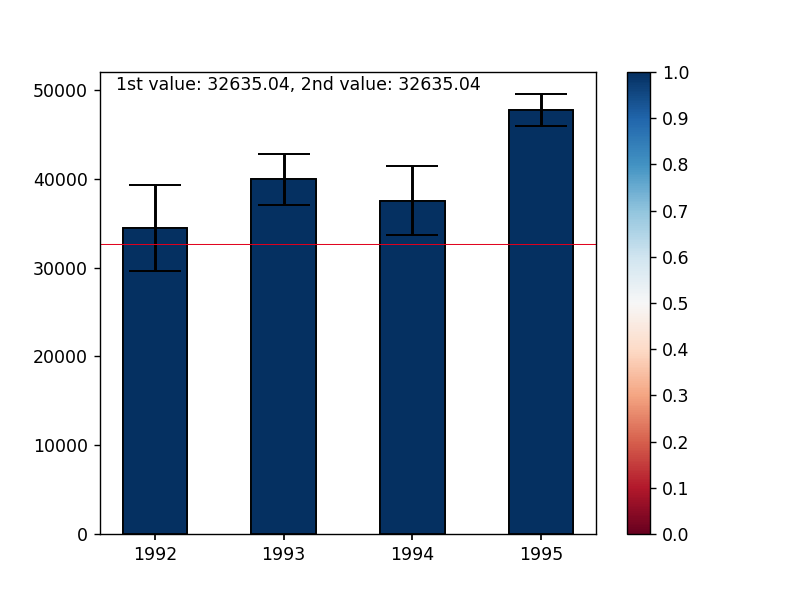

In [3]:
mean_df=mean_df.values
year = (1992, 1993, 1994, 1995)
fig, ax = plt.subplots() # Initiate a new plot

plt.title("Hardest: click and hold to select the span") # Title and instructions

#cmap = col.LinearSegmentedColormap.from_list('custom red', ['white','#2250B2'])# set a colormap, white to blue
cmap=get_cmap('RdBu')
sm2 = cm.ScalarMappable(col.Normalize(0,1), cmap) # map the normalized value (0-1) to the colormap
sm2.set_array([]) # set up a new blank array to be mapped

# set bar plot parameters
width = 0.5
ind = np.arange(len(year)) # set x values
left = ind - width/2
right = ind + width/2
height = mean_df # set the height of the bar equals to the mean

# define the function to get the probability of true mean falling in the selected range
def get_span_p(val_1, val_2):
    """The function has two input, indicating the lower and higher limit of the range. The order of the input doesn't matter
    The output will be the probability of the true mean of each dataset falling in the range"""
    vall = val_1
    valh = val_2
    # compare the two values and assign the smaller value to the lower limit of the range and larger value to the higher limit of the range
    if val_1 - val_2 > 0: 
        vall = val_2
        valh = val_1
    half = (valh-vall)/2
    c1 = st.norm(mean_df[0],diffR[0]).cdf(mean_df[0]+half)-st.norm(mean_df[0],diffR[0]).cdf(mean_df[0]-half)
    c2 = st.norm(mean_df[1],diffR[1]).cdf(mean_df[1]+half)-st.norm(mean_df[1],diffR[1]).cdf(mean_df[1]-half)
    c3 = st.norm(mean_df[2],diffR[2]).cdf(mean_df[2]+half)-st.norm(mean_df[2],diffR[2]).cdf(mean_df[2]-half)
    c4 = st.norm(mean_df[3],diffR[3]).cdf(mean_df[3]+half)-st.norm(mean_df[3],diffR[3]).cdf(mean_df[3]-half)
    c=[c1,c2,c3,c4]
    p = []
    for i in range(len(mean_df)):
        loc = mean_df[i]
        scale = diffR[i]
        # calculate the probability 
        # because the distribution of mean is also a normal distribution with loc = data mean and scale = standard error
        # the difference between the cdf indicate the probability of the true mean falling within the range
        ph = scipy.stats.norm.cdf(val_h, loc = loc, scale = scale) # calculate the cumulative probability at the higher limit in the mean distribution
        pl = scipy.stats.norm.cdf(val_l, loc = loc, scale = scale) # calculate the cumulative probability at the lower limit in the mean distribution
        p.append((ph - pl)/c[i]) # calculate the difference in the cumulated probability
    return p

# create a class for the interactive selection
class span:
    def __init__(self, ax):
        """initialize static variable, must have an input of the axes"""
        self.ax = ax # the input of the ax
        self.val_1 = None
        self.val_2 = None

    
    def val1(self, event):
        """The interaction activated by the event that the user press the button in the figure"""
        self.ax.cla() # clear current drawing
        rects = ax.bar(ind, mean_df, width, yerr = diffR, capsize = 15, edgecolor = 'k', color = 'white') # initialize the white bar
        self.val_1 = event.ydata # set the first value to be the ydata from the pressing point
        self.l1 = self.ax.axhline(y = self.val_1, linewidth = 0.5, color = 'b', label = 'value {}'.format(self.val_1)) # draw the horizontal line to illustrate the first value
        
        # set ax parameters
        ax.set_xticks(ind)
        ax.tick_params(axis = 'x', width=1)
        ax.set_xticklabels(year)
        
    def val2(self, event):
        """The interaction activated by the event that the user release the button in the figure"""
        self.val_2 = event.ydata # set the second value to be the ydata of the releasing point
        self.l2 = self.ax.axhline(y = self.val_2, linewidth = 0.5, color = 'r', label = 'value {}'.format(self.val_2)) # draw the horizontal line to illustrate the second value
        self.spans = self.ax.axhspan(ymin = self.val_1, ymax = self.val_2, color = '#FFD87F', alpha = 0.1) # draw the span
        self.rects = ax.bar(ind, mean_df, width, yerr = diffR, capsize = 15, edgecolor = 'k', color = sm2.to_rgba(get_span_p(self.val_1, self.val_2))) # set the color of the bars
        
        # set ax parameters
        ax.set_xticks(ind)
        ax.tick_params(axis = 'x', width=1)
        ax.set_xticklabels(year)
        
        self.ax.annotate('1st value: {:.02f}, 2nd value: {:.02f}'.format(self.val_1, self.val_2), (-0.3,50000))# annotate the value range to the figure
        
        
    def connect(self):
        """connect the interaction events with the function"""
        self.press = fig.canvas.mpl_connect('button_press_event', self.val1)
        self.release = fig.canvas.mpl_connect('button_release_event', self.val2)
        


#rects = ax.bar(ind, mean, width, yerr = error, capsize = 15, edgecolor = 'k', color = 'white') # initialize the figure before interaction
val_l = 33000
val_h = 45000
lline = ax.axhline(y = val_l, linewidth = 0.3, color = 'r') # draw the horizontal line indicating the lower bound
hline = ax.axhline(y = val_h, linewidth = 0.3, color = 'b') # draw the horizontal line indicating the higher bound
spans = ax.axhspan(ymin = val_l, ymax = val_h, color = '#FFD87F', alpha = 0.1) # draw the span
rects = ax.bar(ind, mean_df, width, yerr = diffR, capsize = 15, edgecolor = 'k', color = sm2.to_rgba(get_span_p(val_l, val_h))) 
ax.annotate('low: {:.02f}, high: {:.02f}'.format(val_l, val_h), (-0.3,50000)) # annotate the figure

# set ax parameters
ax.set_xticks(ind)
ax.tick_params(axis = 'x', width=1)
ax.set_xticklabels(year)

colorbar = plt.colorbar(sm2, ticks = np.linspace(0.0, 1.0, 11)) # add color bar


sp = span(ax) # generate a class
sp.connect() # call the connect function   
   